In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#import heart attack costs dataframe

ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')

In [4]:
#remove unneccessary columns aka those which have all the same value

ha_costs_df = ha_costs_df.drop(columns = ['geography', 'primary_race','primary_denominator','year','measure','adjustment','analysis','domain','primary_sex','primary_age','primary_dual'])

In [5]:
#check new header

ha_costs_df.head(5)

,condition,fips,county,state,urban,analysis_value
0,Acute myocardial infarction,1001,Autauga County,ALABAMA,Urban,40470
1,Acute myocardial infarction,1003,Baldwin County,ALABAMA,Rural,36615
2,Acute myocardial infarction,1005,Barbour County,ALABAMA,Rural,46509
3,Acute myocardial infarction,1007,Bibb County,ALABAMA,Urban,42949
4,Acute myocardial infarction,1009,Blount County,ALABAMA,Urban,50067


In [6]:
#Keep only the rows where facilities are in TN

ha_costs_tn = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE']

In [7]:
#Print dimensions

ha_costs_tn.shape

(91, 6)

In [8]:
#How many counties are unique?

ha_costs_tn.county.nunique()

91

In [9]:
#How many counties are urban? rural?

ha_costs_tn['urban'].value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [10]:
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')

In [11]:
#remove unneccessary columns aka those which have all the same value

cancer_costs_df = cancer_costs_df.drop(columns = ['geography', 'primary_race','primary_denominator','year','measure','adjustment','analysis','domain','primary_sex','primary_age','primary_dual'])

In [12]:
#Keep only the rows where facilities are in TN

cancer_costs_tn = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

In [13]:
#Print dimensions

cancer_costs_tn.shape

(95, 6)

In [14]:
cancer_costs_tn['county'].nunique()

95

In [15]:
#Which counties are missing between the two data sets?

cancer_costs_tn.loc[~cancer_costs_tn['county'].isin(ha_costs_tn['county'])]['county']

2429      Hancock County
2459        Moore County
2464      Pickett County
2483    Van Buren County
Name: county, dtype: object

In [16]:
#import new INCOME dataframe

income_df = pd.read_csv('../data/irs_county_2016.csv')

In [17]:
income_df.shape

(25536, 148)

In [19]:
#create new data frame with only TN

income_tn = income_df.loc[income_df['STATE'] == 'TN']

In [20]:
#Keep only specified columns

income_tn = income_tn.loc[:,['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [21]:
#rename columns

income_tn.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [22]:
#Determine differences in distrubutions of 'analysis' column between heart attack costs and cancer costs dataframes

ha_costs_tn_urban = ha_costs_tn.loc[ha_costs_tn['urban'] == 'Urban']
ha_costs_tn_urban.analysis_value.describe()

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64

In [26]:
cancer_costs_tn.analysis_value.describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

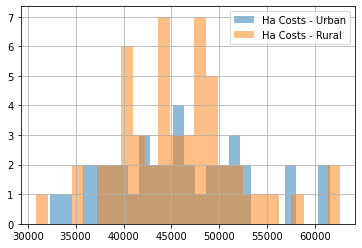

In [24]:
#another way... using a histogram

h = ha_costs_tn.analysis_value[ha_costs_tn.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Ha Costs - Urban')
ha_costs_tn.analysis_value[ha_costs_tn.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Ha Costs - Rural')
h.legend()

In [25]:
#another way using groupby()

ha_costs_tn.groupby(['urban']).mean()

,fips,analysis_value
urban,,
Rural,47086.320755,45773.075472
Urban,47103.789474,45748.921053


In [28]:
income_dict = {0:'Total', 1:'Under $1', 2:'Between 1 and $10,000', 
 3:'Between 10,000 and $25,000',4:'Between 25,000 and $50,000', 5:'Between 50,000 and $75,000', 6:'Between 75,000 and $100,000', 7:'Between 100,000 and $200,000', 8:'$200,000 or more'}

In [32]:
income_tn.income_bucket = income_tn.income_bucket.replace(income_dict)
income_tn.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,"Between 75,000 and $100,000",241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,"Between 100,000 and $200,000",298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,"$200,000 or more",97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


In [34]:
income_county_agg = income_tn.groupby(by=['county']).sum().reset_index()
income_county_agg.head(5)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [36]:
#which county has the greatest number of returns?
#exclude total "Tennessee" data to leave just individual county data

income_county_agg = income_county_agg.loc[income_county_agg['county'] != 'Tennessee'] 

#use idx.max() to 
income_county_agg.loc[income_county_agg_county_only['return_count'].idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

In [39]:
#Does it also have the greatest total income? If same result, yes.

income_county_agg.loc[income_county_agg_county_only['agi'].idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object